<a href="https://colab.research.google.com/github/seoyujiin/esaa_ob/blob/main/%ED%8C%8C%EB%A8%B8ch8_6~9(7%EC%A0%9C%EC%99%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**CHAPTER 8 텍스트 분석**

###**06 토픽 모델링(Topic Modeling) - 20 뉴스그룹**

* 토픽 모델링: 문서 집합에 숨어 있는 주제를 찾아내는 것
* 머신러닝 기반의 토픽 모델링을 적용해 숨어 있는 중요 주제를 효과적으로 찾아낼 수 있음
* 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출함
* 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 LSA(Latent Semantic Analysis)와 LDA(Latent Dirichlet Allocation). 이 절에서는 LDA만을 이용해 토픽 모델링 수행(토픽 모델링에 사용되는 LDA와 차원축소의 LDA는 서로 다른 알고리즘이므로 유의)
* 사이킷런은 LDA 기반의 토픽 모델링을 LatentDirichletAllocation 클래스로 제공

20 뉴스그룹은 20가지의 주제를 가진 뉴스그룹의 데이터를 가지고 있음

→ 이 중 모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제를 추출하고 이들 텍스트에 LDA 기반의 토픽 모델링 적용

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                             ngram_range=(1, 2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


→ CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터

→ 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링 수행

In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)  # n_components 파라미터로 토픽 개수 조정
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
# components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있음
# 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

→ components_는 array[8, 4000]으로 구성되어 있음

→ 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있음

ex. components_ array의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값을 가지고 있음

In [ ]:
# display_topics() 함수를 만들어 각 토픽별로 연관도가 높은 순으로 Word 나열

def display_topics(model, feature_namse, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CounVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


→ Topic #1, Topic #3 애매한 주제어 추출됨

→ 특히 모토사이클, 야구 주제의 경우 명확한 주제어가 추출되지 않음

###**08 문서 유사도**

**문서 유사도 측정 방법 - 코사인 유사도**

* 문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도(Cosine Similarity)를 사용
* 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반함
* 즉 코사인 유사도는 두 벡터 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

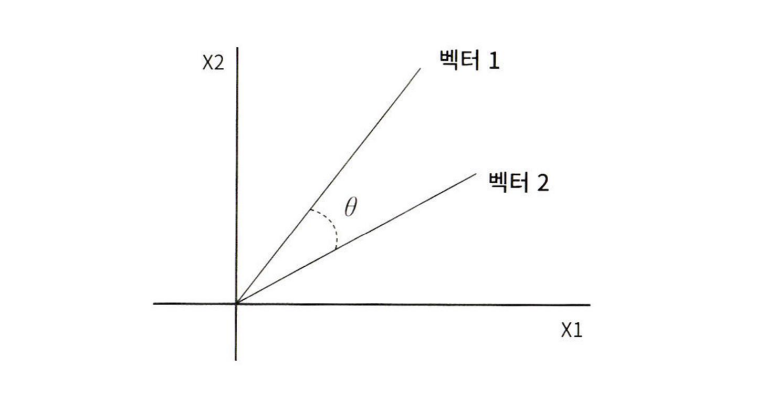

**두 벡터 사잇각**

* 두 벡터의 사잇각에 따라서 싱호 관계는 유사하거나 관련이 없거나 아예 반대 관계가 될 수 있음

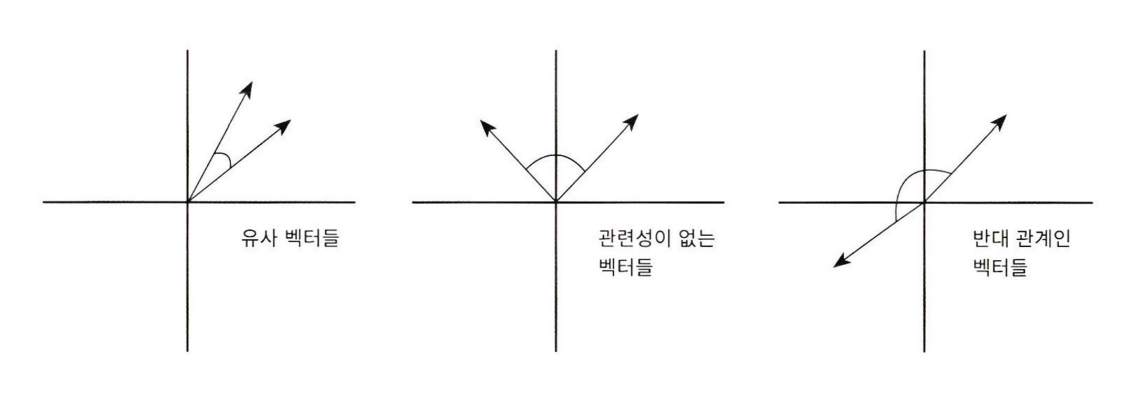

* 두 벡터 A와 B의 코사인 값은 다음 식으로 구할 수 있음
$$
A*B = ||A||||B||cos\theta
$$
* 따라서 유사도 cos 𝛳는 다음과 같이 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것(즉, 내적 결과를 총 벡터 크기로 정규화(L2 Norm)한 것)
$$
similarity = cosθ = \frac{AꞏB}{||A|||B||} = \frac{\sum\limits_{i=1}^{n} A_iB_i}{\sqrt{\sum\limits_{i=1}^{n} A_i^2} \sqrt{\sum\limits_{i=1}^{n} B_i^2}}
$$
* 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유
  * 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움. 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(ex. 유클리드 거리 기반 지표)는 정확도가 떨어지기 쉬움
  * 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없음

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import numpy as np

# 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수
def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

In [ ]:
# doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 무장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


→ 첫 번째 문장과 두 번째 문장의 코사인 유사도는 0.402

In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


→ 각각 0.404, 0.456의 유사도를 보임

* 사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API를 제공
  * cosine_similarity() 함수는 두 개의 입력 파라미터를 받음 - 첫 번째 파라미터는 비교 기준이 되는 문서의 피처 행렬, 두 번째 파라미터는 비교되는 문서의 피처 행렬
  * cosine_similarity()는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능함
  * 따라서 별도의 변환 작업이 필요 없음

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


→ 첫 번째 유사도 값인 1은 비교 기준인 첫 번째 문서 자신에 대한 유사도 측정

→ 두 번째 유사도 값인 0.40207758은 첫 번째 문서와 두 번째 문서의 유사도, 0.40425045는 첫 번째 문서와 세 번째 문서의 유사도 값

→ 1이라는 값이 거슬린다면 비교 대상에서 feature_vect[1:]을 이용해 비교 기준 문서를 제외하면 됨

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [ ]:
# cosine_similarity()는 쌍으로(pair) 코사인 유사도 값을 제공할 수 있음
# 모든 개별 문서에 쌍으로 코사인 유사도 값 계산
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


→ cosine_similarity()의 반환 값은 (3, 3) 형태의 ndarray

**Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

# 경로 이동
%cd /content/drive/MyDrive/ESAA/OB/data/OpinosisDataset1.0/topics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ESAA/OB/data/OpinosisDataset1.0/topics


In [ ]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

all_files = glob.glob('*.data')
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도 알아보기

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정 '''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([3, 8, 12, 19, 20, 24, 25, 31, 35, 50], dtype='int64')
##### 비교 기준 문서명  comfort_honda_accord_2008  와 타 문서 유사도######
[[1.         0.25981841 0.83969704 0.33044002 0.15655631 0.18050974
  0.16544257 0.27569738 0.65502034 0.06229873]]


→ 단순히 숫자로만 표시해서는 직관적으로 문서가 어느 정도 유사도를 가지는지 이해하기 어려울 수 있음

→ 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화

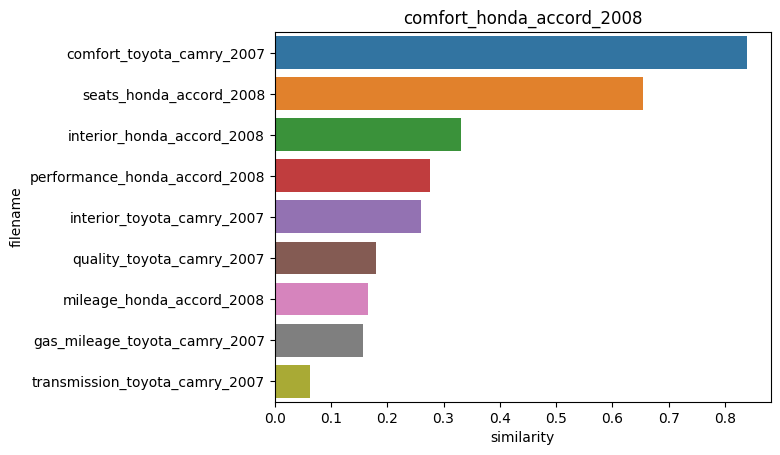

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

fig1 = plt.gcf()
sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)
fig1.savefig('p553_hotel.tif', format='tif', dpi=300, bbox_inches='tight')

###**09 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

**한글 NLP 처리의 어려움**

* 일반적으로 한글 언어 처리는 영어 등의 라틴어 처리보다 어려움(주된 원인은 '띄어쓰기'와 '다양한 조사' 때문)
  * 영어의 경우 띄어쓰기를 잘못하면 의미가 왜곡되는 게 아니라 잘못된 또는 없는 단어로 인식되는 게 대부분이지만 한글은 띄어쓰기를 잘못하면 의미가 왜곡되어 전달될 수 있음
  * 조사는 주어나 목적어를 위해 추가되며, 워낙 경우의 수가 많기 때문에 어근 추출(Stemming/Lemmatization) 등의 전처리 시 제거하기가 까다로움

**KoNLPy 소개**

* KoNLPy: 파이썬의 대표적인 한글 형태소 패키지
  * 형태소: 단어로서 의미를 가지는 최소 단위
  * 형태소 분석(Morphological analysis): 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업
* KoNLPy는 기존의 C/C++, Java로 잘 만들어진 한글 형태소 엔진을 파이썬 래퍼(Wrapper) 기반으로 재작성한 패키지 - 기존의 엔진은 그대로 유지한 채 파이썬 기반에서 인터페이스를 제공하기 때문에 검증된 패키지의 안정성을 유지할 수 있음
* KoNLPy는 파이썬으로 기존 형태소 분석 엔진을 래퍼한 것이기 때문에 Java가 먼저 설치돼 있어야 함. 또한 파이썬에서 Java 클래스를 호출하기 위한 별도의 모듈인 JPype1도 함께 필요

In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 33.2 MB/s eta 0:00:00


**데이터 로딩**

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/data/ratings_train.txt', sep='\t')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# 학습 데이터 세트의 0과 1의 Label 값 비율 살펴보기(1이 긍정, 0이 부정 감성)
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

→ 0과 1의 비율이 어느 한쪽으로 치우치지 않고 균등한 분포를 나타냄

→ train_df의 경우 리뷰 텍스트를 가지는 'document' 칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환, 문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 re를 이용해 이 역시 공백으로 변환

In [ ]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/data/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [ ]:
# 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화
# 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스 이용

from konlpy.tag import Twitter

# "Twitter" has changed to "Okt"
twitter = Twitter()
# 문장을 형태소 단어 형태로 반환하는 함수
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
# 사이킷런의 TfidfVectorizer이용해 TF-IDF 피처 모델 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C' : [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


→ C가 3.5일 때 최고 0.8593의 정확도를 보임

In [ ]:
# 테스트 세트를 이용해 최종 감성 분석 예측 수행
# 테스트 세트를 이용해 예측할 때는 학습할 때 사용한 TfidfVectorizer를 그대로 사용해야 함
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86186
